In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [2]:
from naive_implementation.precision_recall import plot_precision as native_precision, plot_recall as native_recall
from using_kde.precision_recall import plot_precision as kde_precision, plot_recall as kde_recall

Loading dataset

In [3]:
iris = datasets.load_iris().data
iris_features = iris[:, [0, 1, 2]]
iris_values = iris[:, 3]
features_train, features_test, values_train, values_test = train_test_split(iris_features, iris_values, test_size=0.33)

Строим срез (petal length, petal width). Просматривается линейная зависимость

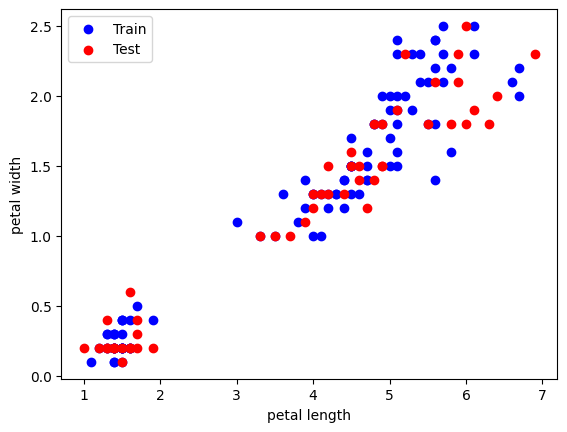

In [4]:
plt.scatter(features_train[:, 2], values_train, c='b')
plt.scatter(features_test[:, 2],  values_test,  c='r')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(["Train", "Test"])

Обучаем линейную модель. petal width = f(sepal length, sepal width, petal length).

In [5]:
reg = LinearRegression().fit(features_train, values_train)
reg.score(features_test, values_test)

0.9393071754035709

Строим срез (petal length, petal width) c учётом предсказанных значений

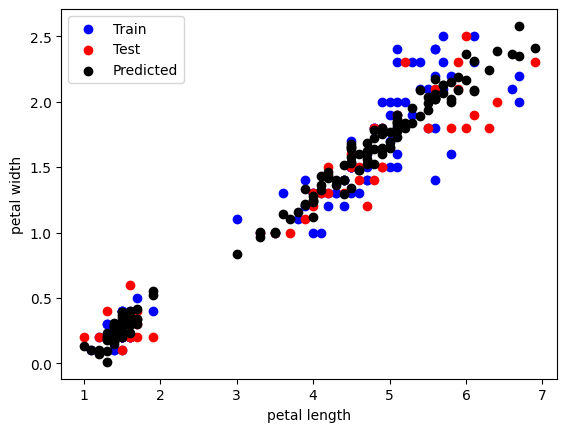

In [6]:
plt.scatter(features_train[:, 2], values_train, c='b')
plt.scatter(features_test[:, 2],  values_test,  c='r')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.scatter(iris_features[:, 2], reg.predict(iris_features), c='k')
plt.legend(["Train", "Test", "Predicted"])

Тестируем функции plot_precision, plot_recall на полученной модели

In [7]:
y_act = iris_values
y_pred = reg.predict(iris_features)

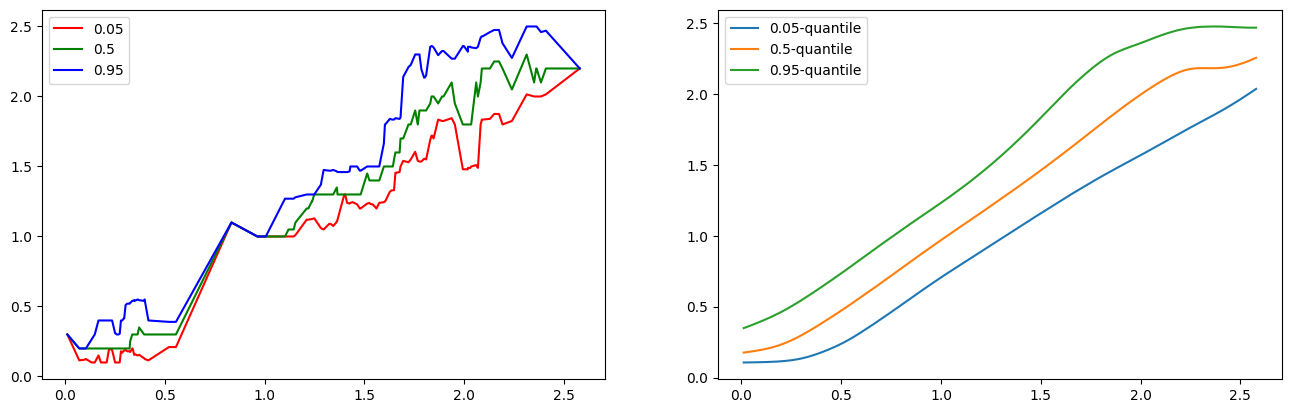

In [8]:
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(16)
native_precision(y_act, y_pred, plt_mode='raw', quantiles=[0.05, 0.5, 0.95], ax=axes[0])
kde_precision(y_act, y_pred, plt_mode='raw', quantiles=[0.05, 0.5, 0.95], ax=axes[1])

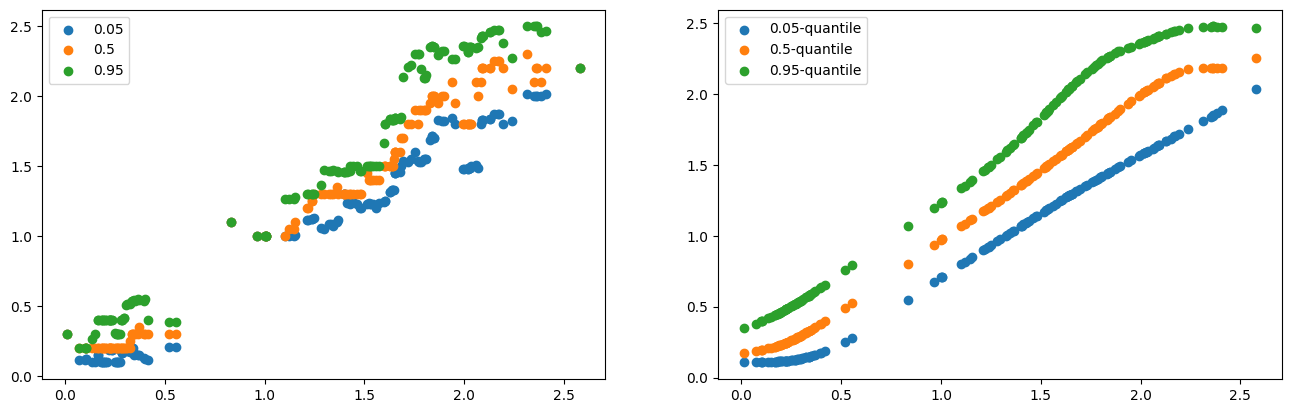

In [9]:
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(16)
native_precision(y_act, y_pred, plt_mode='raw', plotter_mode='scatter', quantiles=[0.05, 0.5, 0.95], ax=axes[0])
kde_precision(y_act, y_pred, plt_mode='raw', plotter_mode='scatter', quantiles=[0.05, 0.5, 0.95], ax=axes[1])

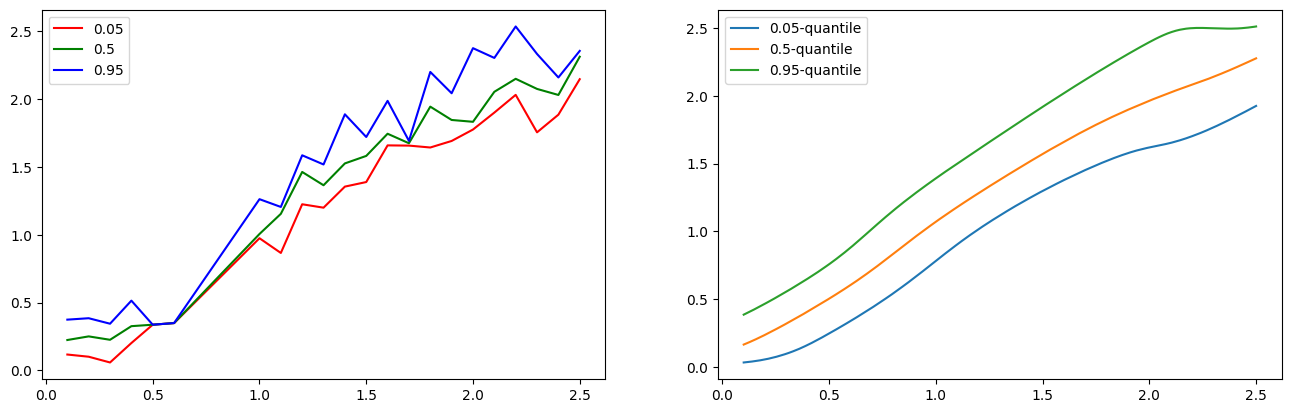

In [10]:
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(16)
native_recall(y_act, y_pred, plt_mode='raw', quantiles=[0.05, 0.5, 0.95], ax=axes[0])
kde_recall(y_act, y_pred, plt_mode='raw', quantiles=[0.05, 0.5, 0.95], ax=axes[1])

In [11]:
plot_recall(y_act, y_pred, plt_mode='raw', plotter_mode='scatter')

NameError: name 'plot_recall' is not defined